In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#important!
data = pd.read_csv(r"D:\USER_PROFILE\Downloads\People.csv")     #copy the path of the file and add r in front
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [7]:
data.satisfaction_level.describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [9]:
data_num = data.select_dtypes(exclude=["object"])
data_obj = data.select_dtypes(include=["object"])

In [11]:
data_num.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [14]:
for i in range(0,2):
    print(data_obj.iloc[:,i].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [15]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
for i in data.columns:
    unique_values = data[i].unique()
    num_unique = len(unique_values)
    if num_unique<11:
        print(i,unique_values)

number_project [2 5 7 6 4 3]
time_spend_company [ 3  6  4  5  2  8 10  7]
work_accident [0 1]
churn [1 0]
promotion_last_5years [0 1]
department ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary ['low' 'medium' 'high']


In [29]:
#important
data.salary = data.salary.astype("category").cat.reorder_categories(['low', 'medium','high']).cat.codes

In [30]:
data.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,churn,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1


In [33]:
data.department.astype("category").cat.reorder_categories(['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT',
 'product_mng', 'marketing', 'RandD']).cat.codes

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       1
        ..
14969    0
14970    0
14971    0
14972    1
14973    1
14974    1
14975    2
14976    2
14977    2
14978    2
14979    3
14980    3
14981    3
14982    3
14983    3
14984    3
14985    3
14986    3
14987    3
14988    3
14989    3
14990    4
14991    4
14992    4
14993    4
14994    4
14995    4
14996    4
14997    4
14998    4
Length: 14999, dtype: int8

In [36]:
departments = pd.get_dummies(data.department,prefix="dep")

In [38]:
data = data.join(departments)

In [40]:
data = data.drop("department", axis=1)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
churn                    14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int8
dep_IT                   14999 non-null uint8
dep_RandD                14999 non-null uint8
dep_accounting           14999 non-null uint8
dep_hr                   14999 non-null uint8
dep_management           14999 non-null uint8
dep_marketing            14999 non-null uint8
dep_product_mng          14999 non-null uint8
dep_sales                14999 non-null uint8
dep_support              14999 non-null uint8
dep_technical            14999 non-null uint8
dtypes: float6

In [44]:
# drop is important for exam
# dummies are not

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


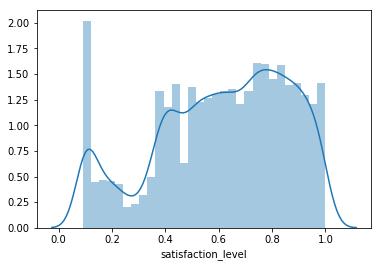

In [45]:
sns.distplot(data.satisfaction_level)

sns.distplot(data.last_evaluation)

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


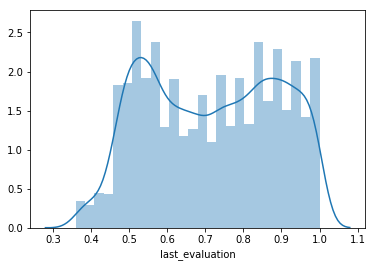

In [46]:
sns.distplot(data.last_evaluation)

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


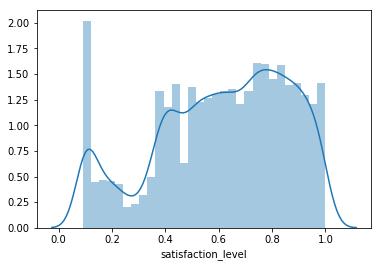

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


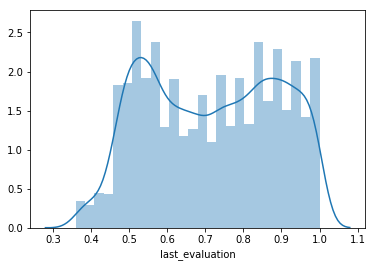

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


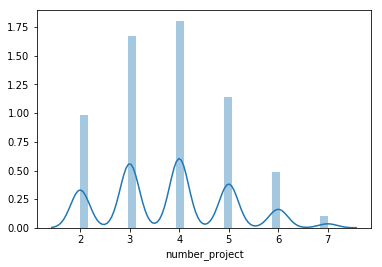

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


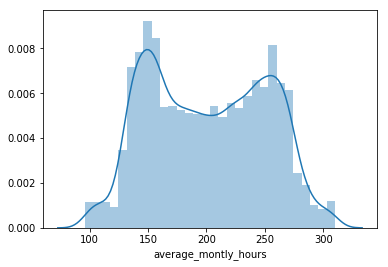

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


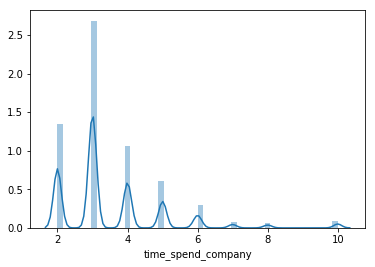

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


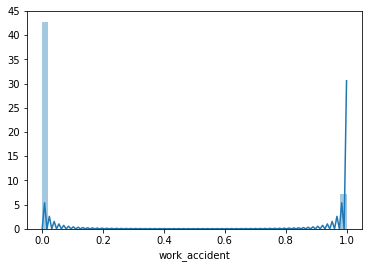

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


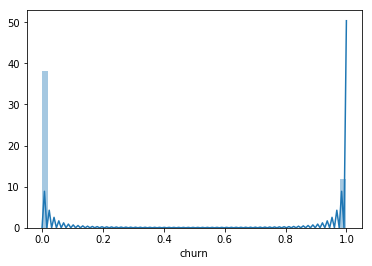

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


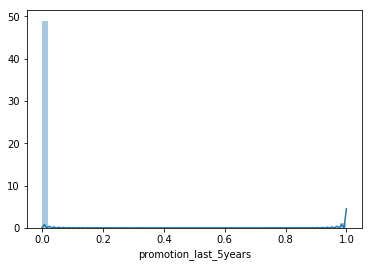

In [52]:
#or
for i in range(0,8):
    sns.distplot(data.iloc[:,i])
    plt.show()  #for showing them separately

In [53]:
print(data)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             0.56               2   
15      

In [57]:
data.iloc[:,[1,2,5]]

,last_evaluation,number_project,work_accident
0,0.53,2,0
1,0.86,5,0
2,0.88,7,0
3,0.87,5,0
4,0.52,2,0
5,0.50,2,0
6,0.77,6,0
7,0.85,5,0
8,1.00,5,0
9,0.53,2,0


In [58]:
data.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36             

In [60]:
sat_level = pd.pivot_table(data=data, values="satisfaction_level", index="salary", aggfunc="mean")

In [61]:
print(sat_level)

        satisfaction_level
salary                    
0                 0.600753
1                 0.621817
2                 0.637470


In [64]:
data.churn.value_counts()/len(data)*100

0    76.191746
1    23.808254
Name: churn, dtype: float64

In [66]:
data.shape #14999 rows and 19 columns

(14999, 19)

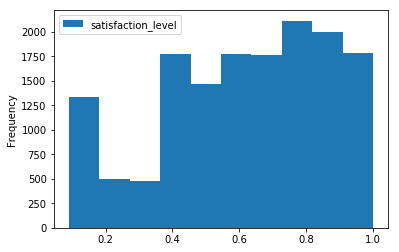

In [71]:
data.plot(x="average_montly_hours", y="satisfaction_level", kind="hist")

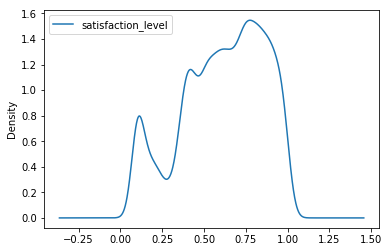

In [72]:
data.plot( y="satisfaction_level", kind="density")

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


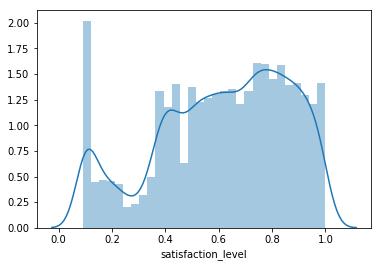

In [73]:
sns.distplot(data.satisfaction_level)

In [75]:
data.plot(y="churn",kind="pie")

ValueError: Image size of 374x225010 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>